In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import yfinance as yf

1. Below dataset contains following information about European call option with expiry date 2022-03-18 for various strikes:
- model_price - output of Black-Scholes model 
- market_price - market mid-price
- spread - market bid-ask spread

Please assess performance of the model. 
If the information presented below is not sufficient , what additional tests/data would you use to assess model?
In addition, are theoretical assumptions of the Black-Schols model satisfied here?

In [197]:
stock_price = 310.
expiry = 35./252. # current date - 2022-01-31, expiry date - 2022-03-18
r = 0.001
vol = 0.2730
option_prices = pd.DataFrame({"strike": [300.0, 305.0, 310.0, 315.0, 320.0, 325.0, 330.0, 335.0, 340.0, 345.0, 350.0, 355.0], 
                               "market_price": [18.57, 15.45, 12.6, 10.15, 8.15, 6.25, 4.7, 3.6, 2.6, 1.97, 1.46, 1.05],
                               "model_price": [18.04, 15.16, 12.6 , 10.35,  8.41,  6.76,  5.37,  4.22,  3.27, 2.52,  1.91,  1.44],
                               "spread": [0.95, 1.05, 0.75, 0.6, 0.35, 0.35, 0.25, 0.25, 0.21, 0.3, 0.14, 0.15]})
option_prices["diff"] = option_prices["market_price"] - option_prices["model_price"]                                 
option_prices["abs_diff"] = option_prices["diff"].abs()       
option_prices

,strike,market_price,model_price,spread,diff,abs_diff
0,300.0,18.57,18.04,0.95,0.53,0.53
1,305.0,15.45,15.16,1.05,0.29,0.29
2,310.0,12.60,12.60,0.75,0.00,0.00
3,315.0,10.15,10.35,0.60,-0.20,0.20
4,320.0,8.15,8.41,0.35,-0.26,0.26
5,325.0,6.25,6.76,0.35,-0.51,0.51
6,330.0,4.70,5.37,0.25,-0.67,0.67
7,335.0,3.60,4.22,0.25,-0.62,0.62
8,340.0,2.60,3.27,0.21,-0.67,0.67
9,345.0,1.97,2.52,0.30,-0.55,0.55


In [198]:
option_prices[["diff", "abs_diff"]].describe()

,diff,abs_diff
count,12.000000,12.000000
mean,-0.291667,0.428333
std,0.387435,0.206786
min,-0.670000,0.000000
25%,-0.567500,0.282500
50%,-0.420000,0.480000
75%,-0.150000,0.567500
max,0.530000,0.670000


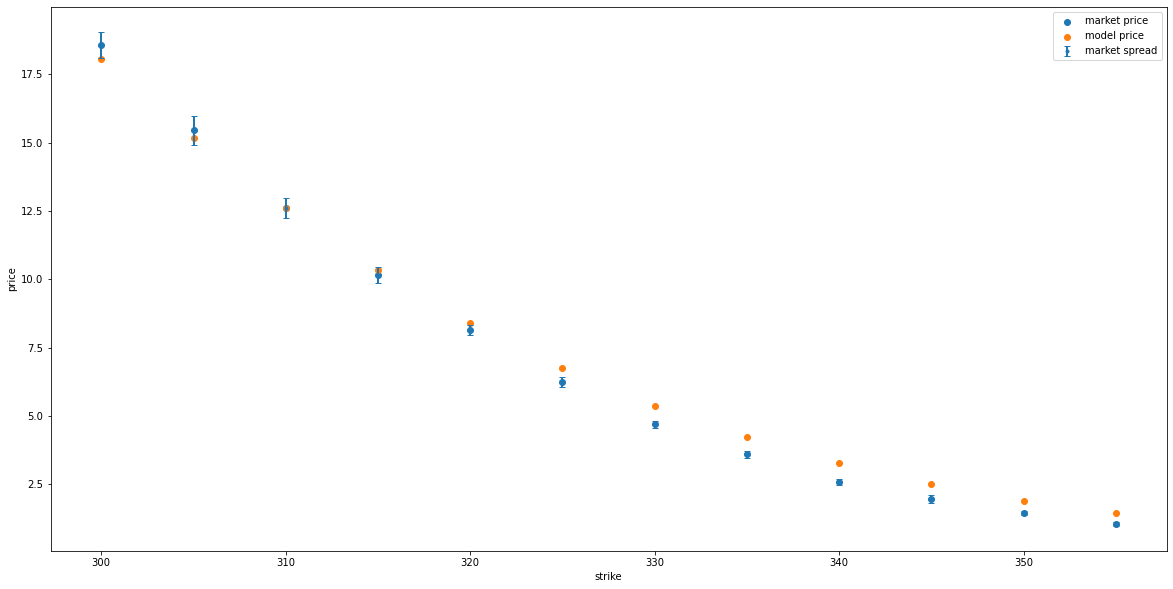

In [199]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(option_prices["strike"], option_prices["market_price"], label="market price", marker="o")
plt.scatter(option_prices["strike"], option_prices["model_price"], label="model price", marker="o")
plt.errorbar(option_prices["strike"], option_prices["market_price"], yerr=option_prices["spread"]/2, label="market spread", marker=".", linewidth=0, elinewidth=2, capsize=3)
plt.xlabel("strike")
plt.ylabel("price")
plt.legend()

2. Assuming that we have below model, please briefly assess:
- linear regression assumptions
- model performance 
- significance of variables. 

Is the summary sufficient or there should be additional tests provided? How can you improve the model? 

Answer:


In [5]:
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 

X = df[['Interest_Rate','Unemployment_Rate']] 
Y = df['Stock_Index_Price']

X = sm.add_constant(X) 

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Wed, 25 Aug 2021   Prob (F-statistic):           4.04e-11
Time:                        14:48:10   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.24

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


3. Please explain how to assess properties of the below timeseries.

Answer:

<AxesSubplot:xlabel='Date'>

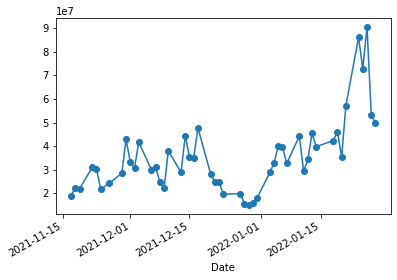

In [200]:

msft = yf.Ticker("MSFT")


# get historical market data
hist = msft.history(period="50d")
hist['Volume'].plot(ls='-', marker='o')

4. Python exercise: 
    Print integers 1 to N, but print "Fizz" if an integer is divisible by 3, "Buzz" if an integer is divisible by 5, and "FizzBuzz" if an integer is divisible by both 3 and 5.

In [ ]:
# Python code